<a href="https://colab.research.google.com/github/pankaj-beldar/patent-data-NLP-classification/blob/main/countvector_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from pandas import set_option
plt.style.use('ggplot') # nice plots
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import missingno as msno
import matplotlib.cm as cm
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [ ]:


# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_excel('/content/drive/MyDrive/Patent_paper/data.xlsx')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#create a function to trasform text
def transform_text(text):
    # covert to lower case
    text = text.lower()
    # tokenize text
    text = nltk.word_tokenize(text)
    # remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    # remove stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    # stemming text
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)



In [ ]:
# stemming object
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')#apply function to required column
df['new_title'] = df['TITLE_OF_INVENTION'].astype(str).apply(transform_text)

In [ ]:
text_df=df[['new_title','TITLE_OF_INVENTION','IPO_LOCATION','NO_OF_PAGES',	'NO_OF_CLAIMS']]
text_df.head()

,new_title,TITLE_OF_INVENTION,IPO_LOCATION,NO_OF_PAGES,NO_OF_CLAIMS
0,diesel engin exhaust aftertreat system method ...,DIESEL ENGINE AND EXHAUST AFTERTREATMENT SYSTE...,Mumbai,16.0,18.0
1,vehicl control devic,VEHICLE CONTROL DEVICE,Delhi,29.0,7.0
2,multipl antigen present immunogen composit met...,MULTIPLE ANTIGEN PRESENTING IMMUNOGENIC COMPOS...,Delhi,107.0,78.0
3,method clean strip turboshaft engin blade use ...,METHOD FOR CLEANING AND STRIPPING A TURBOSHAFT...,Delhi,19.0,10.0
4,materi treatment apparatu,MATERIAL TREATMENT AND APPARATUS,Delhi,22.0,11.0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Read data from CSV file


# Extract the 'new_title' column from the DataFrame
data = text_df['new_title']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the data using CountVectorizer
count_vectorized_data = count_vectorizer.fit_transform(data)

# Print feature names (words)
print("Feature Names (Words) from CountVectorizer:")
print(count_vectorizer.get_feature_names_out())

# Print the transformed data (sparse matrix)
print("Transformed Data (Sparse Matrix) from CountVectorizer:")
print(count_vectorized_data)


Feature Names (Words) from CountVectorizer:
['02' '10' '100' ... 'zscan4' 'zvzc' 'ß1']
Transformed Data (Sparse Matrix) from CountVectorizer:
  (0, 3108)	2
  (0, 3740)	2
  (0, 3945)	2
  (0, 309)	1
  (0, 10747)	1
  (0, 6615)	1
  (0, 11314)	1
  (0, 4550)	1
  (1, 11773)	1
  (1, 2422)	1
  (1, 3030)	1
  (2, 6615)	1
  (2, 7038)	1
  (2, 645)	1
  (2, 8623)	1
  (2, 5407)	1
  (2, 2315)	1
  (2, 11689)	1
  (2, 10974)	1
  (3, 3740)	1
  (3, 6615)	1
  (3, 11689)	1
  (3, 2110)	1
  (3, 10485)	1
  (3, 11453)	1
  :	:
  (35201, 6615)	2
  (35201, 3030)	3
  (35201, 5374)	5
  (35201, 2827)	2
  (35201, 3700)	2
  (35202, 2283)	1
  (35202, 9711)	1
  (35202, 5481)	1
  (35203, 3241)	1
  (35203, 11173)	1
  (35203, 11108)	1
  (35204, 6615)	1
  (35204, 6428)	1
  (35204, 4746)	1
  (35204, 8439)	1
  (35204, 2456)	1
  (35204, 9517)	2
  (35204, 9219)	1
  (35205, 6615)	1
  (35205, 2422)	1
  (35205, 3030)	2
  (35205, 11714)	2
  (35205, 6145)	3
  (35205, 11419)	2
  (35205, 5144)	1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the data using TF-IDF Vectorizer
tfidf_vectorized_data = tfidf_vectorizer.fit_transform(data)

# Print feature names (words)
print("Feature Names (Words) from TF-IDF Vectorizer:")
print(tfidf_vectorizer.get_feature_names_out())

# Print the transformed data (sparse matrix)
print("Transformed Data (Sparse Matrix) from TF-IDF Vectorizer:")
print(tfidf_vectorized_data)


Feature Names (Words) from TF-IDF Vectorizer:
['02' '10' '100' ... 'zscan4' 'zvzc' 'ß1']
Transformed Data (Sparse Matrix) from TF-IDF Vectorizer:
  (0, 4550)	0.3079363429609545
  (0, 11314)	0.2299503319587846
  (0, 6615)	0.07782902155697576
  (0, 10747)	0.10085155829064714
  (0, 309)	0.3094072508495282
  (0, 3945)	0.47459256307899056
  (0, 3740)	0.3858824982982715
  (0, 3108)	0.6051391656541875
  (1, 3030)	0.44395663650049005
  (1, 2422)	0.6094937394222631
  (1, 11773)	0.6568256134715197
  (2, 10974)	0.23865723117544407
  (2, 11689)	0.22303977679802417
  (2, 2315)	0.23917152195610028
  (2, 5407)	0.5307342466601148
  (2, 8623)	0.45943060567403865
  (2, 645)	0.45541070529747135
  (2, 7038)	0.34732931536015316
  (2, 6615)	0.12369753935618127
  (3, 6012)	0.36710537693531514
  (3, 8827)	0.39525780106075453
  (3, 1349)	0.3253832133507563
  (3, 11453)	0.4992760985486688
  (3, 10485)	0.3564049445288246
  (3, 2110)	0.33468113510886566
  :	:
  (35201, 3700)	0.3905005188203769
  (35201, 2827)	0.3

Silhouette Score for 2 clusters: 0.06760560413242092
Silhouette Score for 3 clusters: 0.050737959301906964
Silhouette Score for 4 clusters: 0.04865310389873573
Silhouette Score for 5 clusters: 0.04838359943417264
Silhouette Score for 6 clusters: 0.027098579881632317
Silhouette Score for 7 clusters: 0.02589316015983793
Silhouette Score for 8 clusters: 0.04021545868225366
Silhouette Score for 9 clusters: 0.030932386887420865
Silhouette Score for 10 clusters: 0.031436306176441775


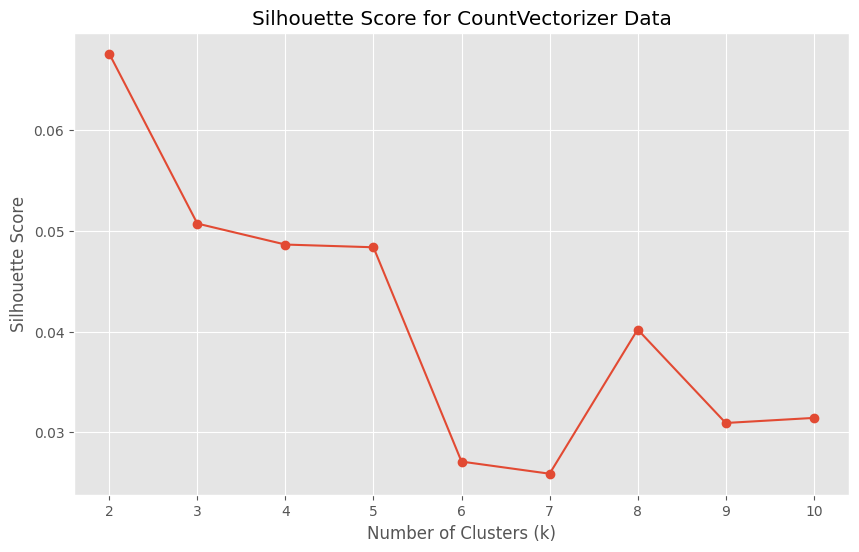

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read data from CSV file


# Extract the 'new_title' column from the DataFrame
data = text_df['new_title']

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the data using CountVectorizer
count_vectorized_data = count_vectorizer.fit_transform(data)

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 11)  # You can adjust the range of k values as needed

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(count_vectorized_data)
    silhouette_avg = silhouette_score(count_vectorized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for CountVectorizer Data')
plt.grid(True)
plt.show()


Silhouette Score for 2 clusters: 0.004278651041497262
Silhouette Score for 3 clusters: 0.006025190184508315
Silhouette Score for 4 clusters: 0.00579097992361701
Silhouette Score for 5 clusters: 0.0064603677079333715
Silhouette Score for 6 clusters: 0.010001759819054053
Silhouette Score for 7 clusters: 0.009253144164695382
Silhouette Score for 8 clusters: 0.009516652377155618
Silhouette Score for 9 clusters: 0.010076483669531976
Silhouette Score for 10 clusters: 0.01066673184344248
Silhouette Score for 11 clusters: 0.01234191268994127
Silhouette Score for 12 clusters: 0.012470389202458769
Silhouette Score for 13 clusters: 0.014606414169176057
Silhouette Score for 14 clusters: 0.014806497932476006
Silhouette Score for 15 clusters: 0.016488251251036347
Silhouette Score for 16 clusters: 0.015202829398326493
Silhouette Score for 17 clusters: 0.016122495709301254
Silhouette Score for 18 clusters: 0.017046309207930124
Silhouette Score for 19 clusters: 0.017389664415523583


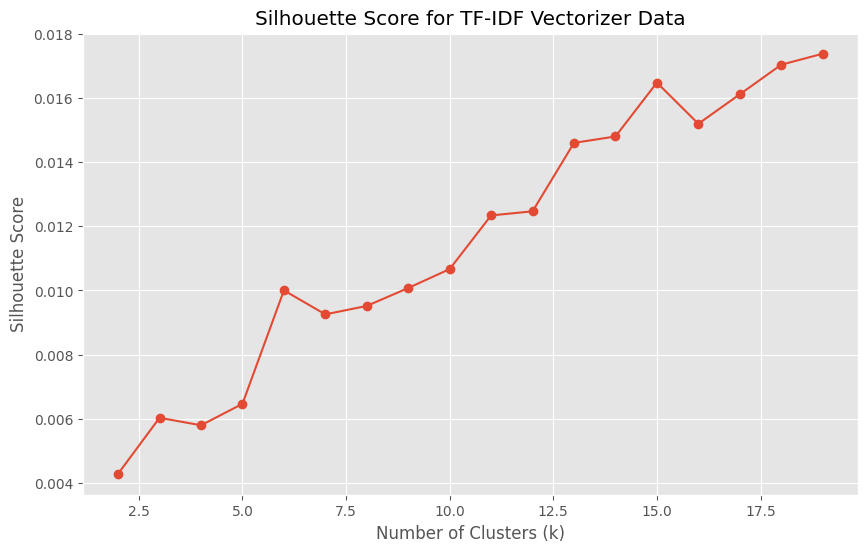

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Read data from CSV file


# Extract the 'new_title' column from the DataFrame
data = text_df['new_title']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the data using TF-IDF Vectorizer
tfidf_vectorized_data = tfidf_vectorizer.fit_transform(data)

# Calculate silhouette score for different values of k
silhouette_scores = []
possible_k_values = range(2, 20)  # You can adjust the range of k values as needed

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_vectorized_data)
    silhouette_avg = silhouette_score(tfidf_vectorized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for TF-IDF Vectorizer Data')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer


# Instantiate DBSCAN with appropriate parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps (epsilon) and min_samples based on your data

# Fit the DBSCAN model
dbscan_labels = dbscan.fit_predict(tfidf_vectorized_data)

# DBSCAN assigns cluster labels (starting from 0). -1 indicates noise (outliers).
print("Cluster Labels: ", dbscan_labels)


Cluster Labels:  [-1  0 -1 ... -1 -1 -1]


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have already performed clustering and have cluster labels (dbscan_labels)
# dbscan_labels = [0, 1, 1, -1, 0, ...]  # Example cluster labels

# Calculate silhouette score
silhouette_avg = silhouette_score(tfidf_vectorized_data, dbscan_labels)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: -0.25254348485630307
